## Problem Statement 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

#### Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Solution is divided into below mentioned sections:
1. Reading and understanding the data-sets
2. Analysis - Univariate, Bivariate and Multivariate Analysis
3. Data preparation and creation of dummy variables
4. Splitting the Data into Training and Testing Sets
5. Building a linear model - Using RFE and Manual(VIF+P-value)
6. Residual Analysis of the train data and validation
7. Making Predictions and Model Evaluation

## Veriosn used for different libraries: 
1. numpy - version: 1.26.4
2. pandas - version: 2.2.2
3. matplotlib - version: 3.9.2
4. seaborn - version: 0.13.2
5. statsmodel - version: 0.14.2
6. sklearn - version: 1.5.1

## Reading and understanding the data-sets

In [17283]:
# Import warning library
import warnings
warnings.filterwarnings('ignore')

In [17284]:
# Import numpy and pandas libarary 
import numpy as np
import pandas as pd

In [17285]:
# Read the csv file - day
Bike_Sharing = pd.read_csv("day.csv")

In [17286]:
# Have a look at the data-set
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17287]:
# Check the shape of data
Bike_Sharing.shape

(730, 16)

In [17288]:
# Check the info of data-set
Bike_Sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [17289]:
# Check for null values 
Bike_Sharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values. We don't need to remove the null values 

In [17291]:
# Drop the duplicate values 
Bike_Sharing.drop_duplicates(inplace= True)

In [17292]:
# Check for shape of dataframe
Bike_Sharing.shape

(730, 16)

The shape of the data-frame is still same as before. This mean there are no duplicate values present.

In [17294]:
# Let's analyse the columns 
Bike_Sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Drop the columns which will not be required in analysis like 
instant as it is index column, 
dteday as month and year has already beeen extracted from it
casual and registered as cnt is combined of casual and resitered values


In [17296]:
Bike_Sharing.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace=True)
Bike_Sharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [17297]:
# Let's map the values of season, year, month, weekday and weathersit to analyse the data
Bike_Sharing['season'] = Bike_Sharing['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
Bike_Sharing['yr'] = Bike_Sharing['yr'].map({0: 2018, 1:2019})
Bike_Sharing['mnth'] = Bike_Sharing['mnth'].map({ 1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
Bike_Sharing['weekday']= Bike_Sharing['weekday'].map({0:'SUN',1:'MON',2:'TUE',3:'WED',4:'THUR',5:'FRI',6:'SAT'})
Bike_Sharing['weathersit'] = Bike_Sharing['weathersit'].map({1:'Clear', 2:'Mist_cloudy', 3:'Light_Snow', 4:'Heavy_Rain'})
Bike_Sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,SAT,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,SUN,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,MON,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,TUE,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,WED,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17298]:
# Import seaborn and matplotlib for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt



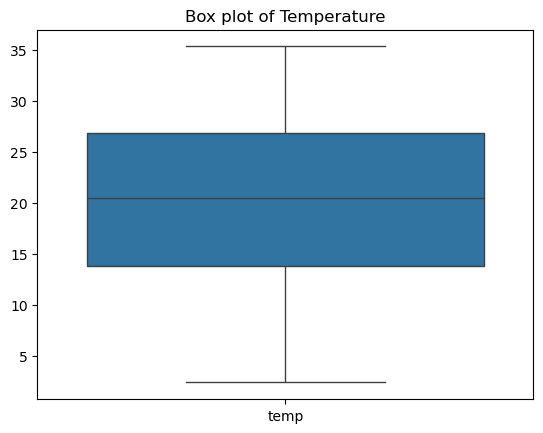

In [17299]:
# Let's draw the box-plots on temp 
sns.boxplot(Bike_Sharing[['temp']])
plt.title("Box plot of Temperature")
plt.show()

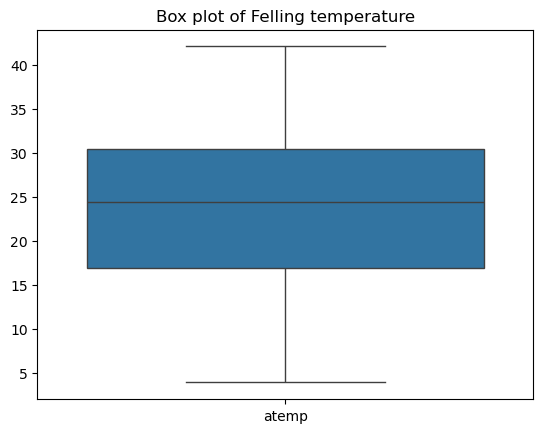

In [17300]:
# Let's draw the box-plots on atemp 
sns.boxplot(Bike_Sharing[['atemp']])
plt.title("Box plot of Felling temperature")
plt.show()

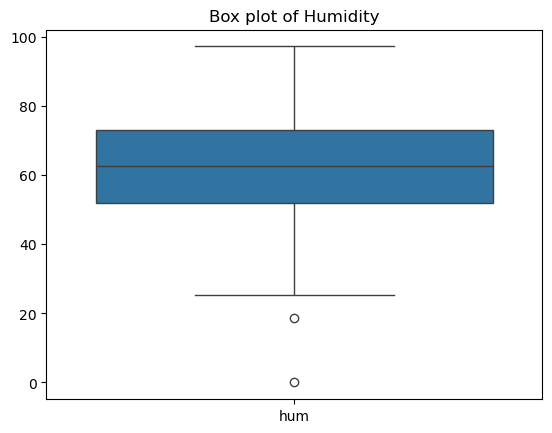

In [17301]:
# Let's draw the box-plots on hum 
sns.boxplot(Bike_Sharing[['hum']])
plt.title("Box plot of Humidity")
plt.show()

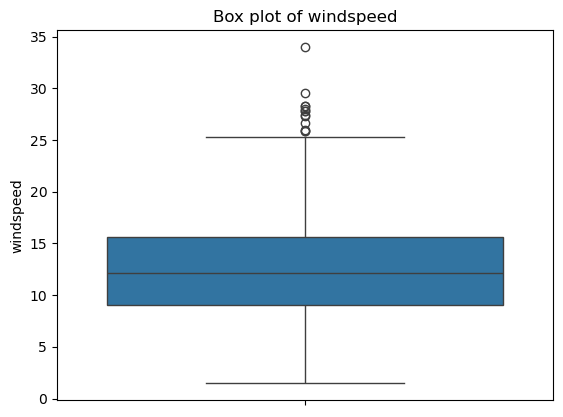

In [17302]:
# Let's draw the box-plots on temp windspeed
sns.boxplot(Bike_Sharing['windspeed'])
plt.title("Box plot of windspeed")
plt.show()

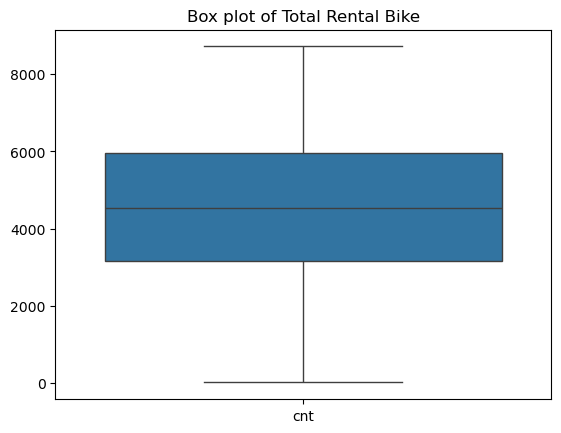

In [17303]:
# Let's draw the box-plots on temp cnt
sns.boxplot(Bike_Sharing[['cnt']])
plt.title("Box plot of Total Rental Bike")
plt.show()


In [17304]:
# Lets check min, max, 50% on numerical data-sets
Bike_Sharing.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2018.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2018.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,2018.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,2019.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,2019.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# Univariate Analysis

In [17306]:
# Value of count on season variable 
Bike_Sharing['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

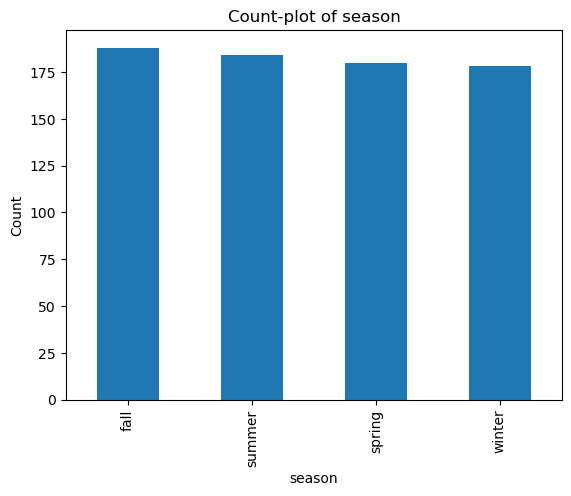

In [17307]:
# Count-plot of season variable
Bike_Sharing['season'].value_counts().plot.bar()
plt.title('Count-plot of season')
plt.xlabel('season')
plt.ylabel('Count')
plt.show()

Count of all the 4 seasons - fall, summer, spring and winters are near-by. Count of fall is the maximum

In [17309]:
# Value count of month 
Bike_Sharing['mnth'].value_counts()

mnth
jan     62
mar     62
may     62
july    62
aug     62
oct     62
dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: count, dtype: int64

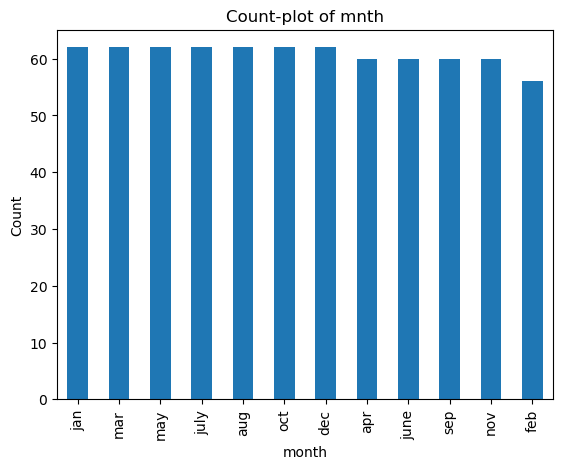

In [17310]:
# Count plot of month
Bike_Sharing['mnth'].value_counts().plot.bar()
plt.title('Count-plot of mnth')
plt.xlabel('month')
plt.ylabel('Count')
plt.show()

Frequency of jan, mar, may, july, aug, and dec are highest


In [17312]:
# Value count on year
Bike_Sharing['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

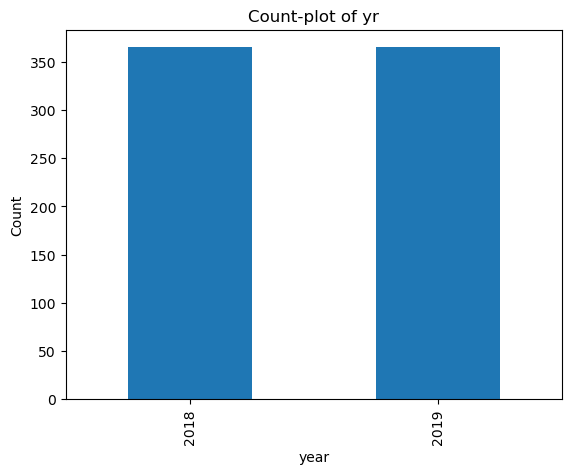

In [17313]:
# Count-plot graph on year 
Bike_Sharing['yr'].value_counts().plot.bar()
plt.title('Count-plot of yr')
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

The frequency of both the years are same

In [17315]:
# The value count on weekday
Bike_Sharing['weekday'].value_counts()

weekday
SAT     105
SUN     105
MON     105
TUE     104
THUR    104
FRI     104
WED     103
Name: count, dtype: int64

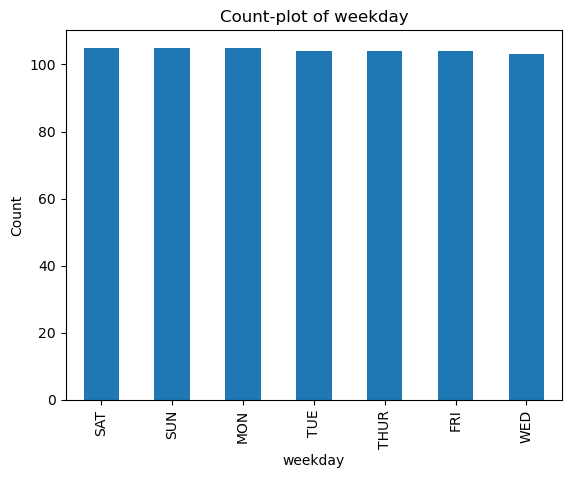

In [17316]:
# Count-plot on weekday
Bike_Sharing['weekday'].value_counts().plot.bar()
plt.title('Count-plot of weekday')
plt.xlabel('weekday')
plt.ylabel('Count')
plt.show()

The frequecy of almost all the weekdays are almost same.

In [17318]:
# Value count on weathersit
Bike_Sharing['weathersit'].value_counts()

weathersit
Clear          463
Mist_cloudy    246
Light_Snow      21
Name: count, dtype: int64

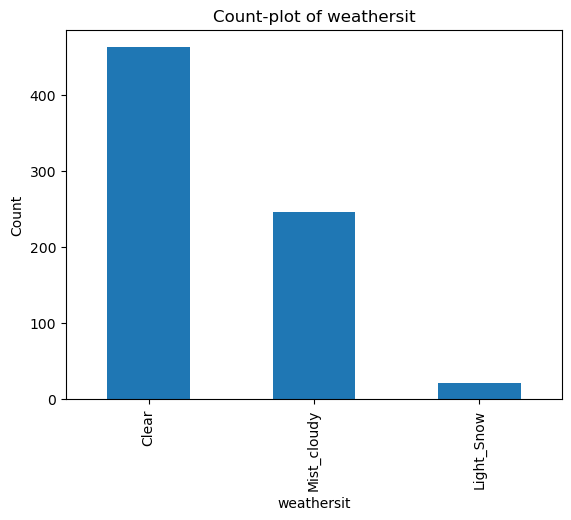

In [17319]:
# Count plot on weathersit
Bike_Sharing['weathersit'].value_counts().plot.bar()
plt.title('Count-plot of weathersit')
plt.xlabel('weathersit')
plt.ylabel('Count')
plt.show()

The frequency of clear is 463 which is highest and second highest is Mist cloudy 

In [17321]:
# Value count on holiday
Bike_Sharing['holiday'].value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

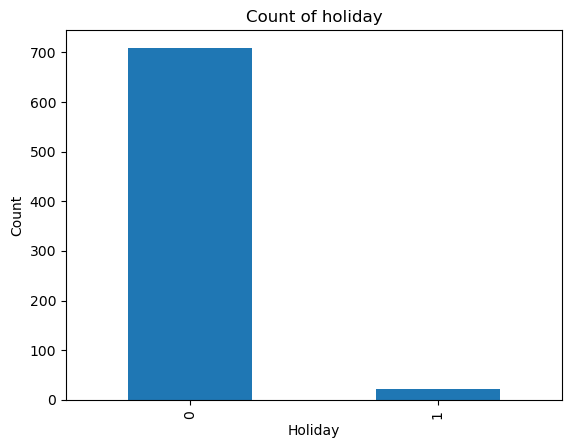

In [17322]:
# Count-plot on holiday
Bike_Sharing['holiday'].value_counts().plot.bar()
plt.title('Count of holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

The frequency of days which are not holiday is more than days which are considered holiday

In [17324]:
# The value count on workingday
Bike_Sharing['workingday'].value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

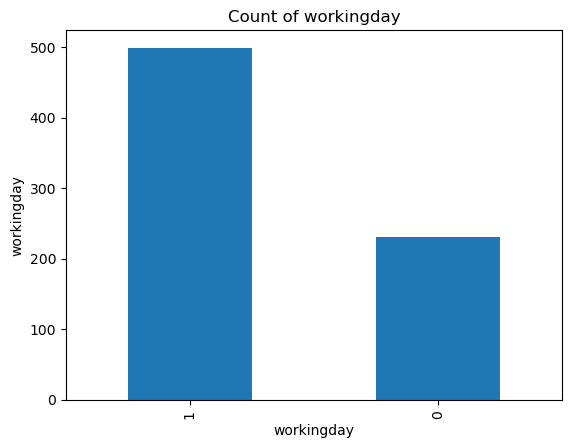

In [17325]:
# Count plot on workingday
Bike_Sharing['workingday'].value_counts().plot.bar()
plt.title('Count of workingday')
plt.xlabel('workingday')
plt.ylabel('workingday')
plt.show()

The frequency of working day is more than days which are not considered working

## Bivariate Analysis


In [17328]:
# Lets check the data-types of columns 
Bike_Sharing.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

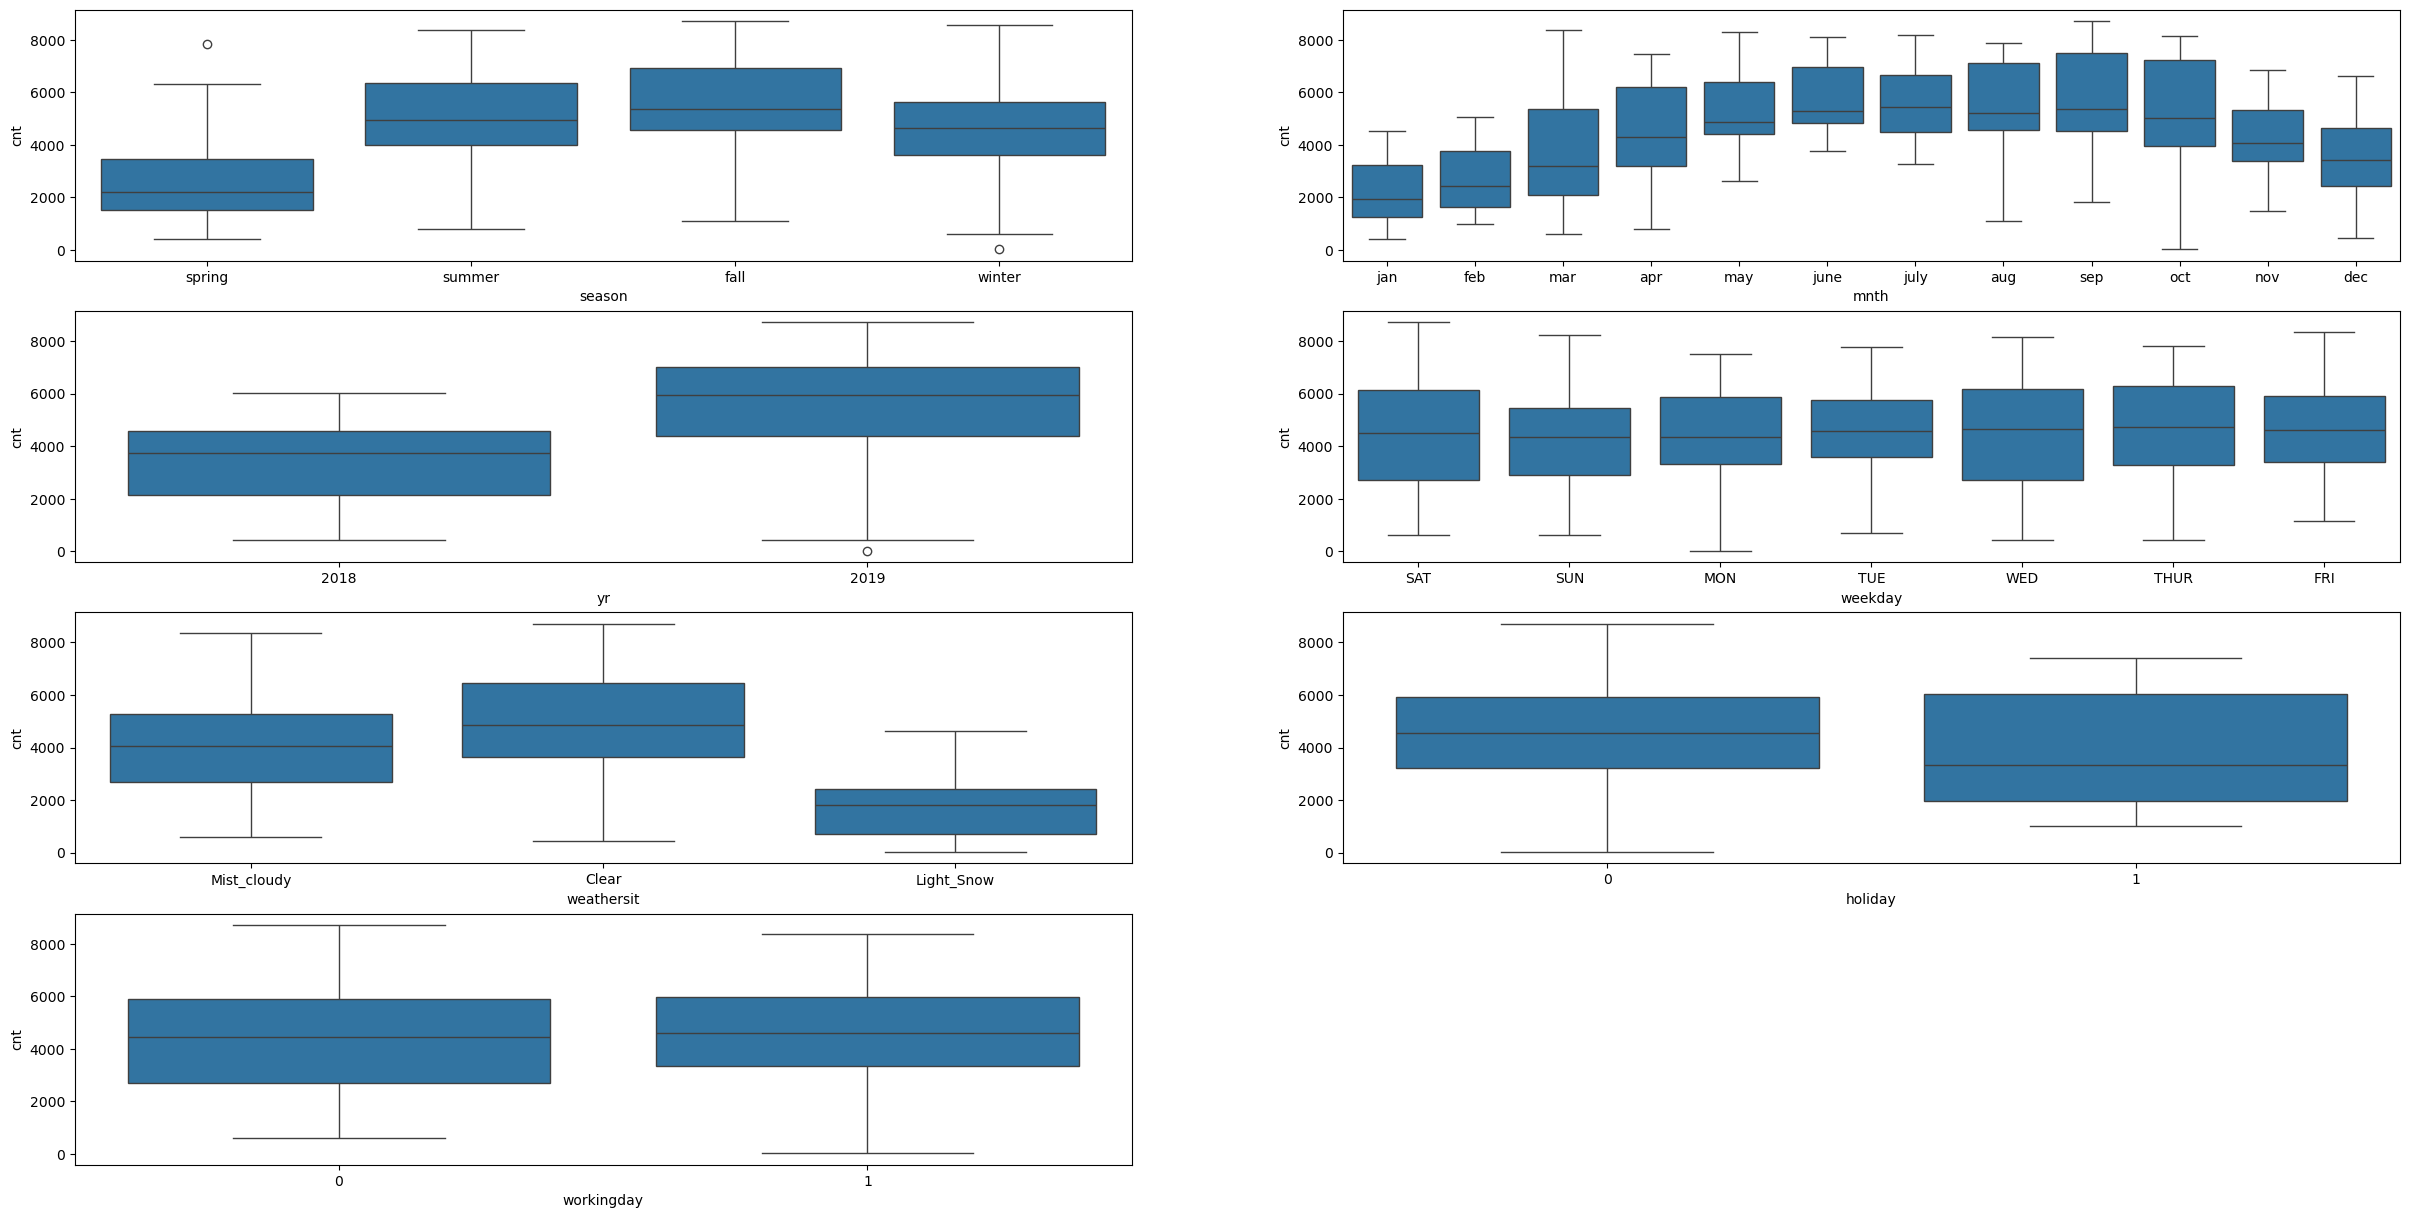

In [17329]:
# Bivariate Analysis of categorical columns with respect to count column
# Create box-plot of categorical variables

plt.figure(figsize=(30, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike_Sharing)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike_Sharing)
plt.subplot(4,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data = Bike_Sharing)
plt.subplot(4,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike_Sharing)
plt.subplot(4,2,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike_Sharing)
plt.subplot(4,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike_Sharing)
plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike_Sharing)
plt.show()

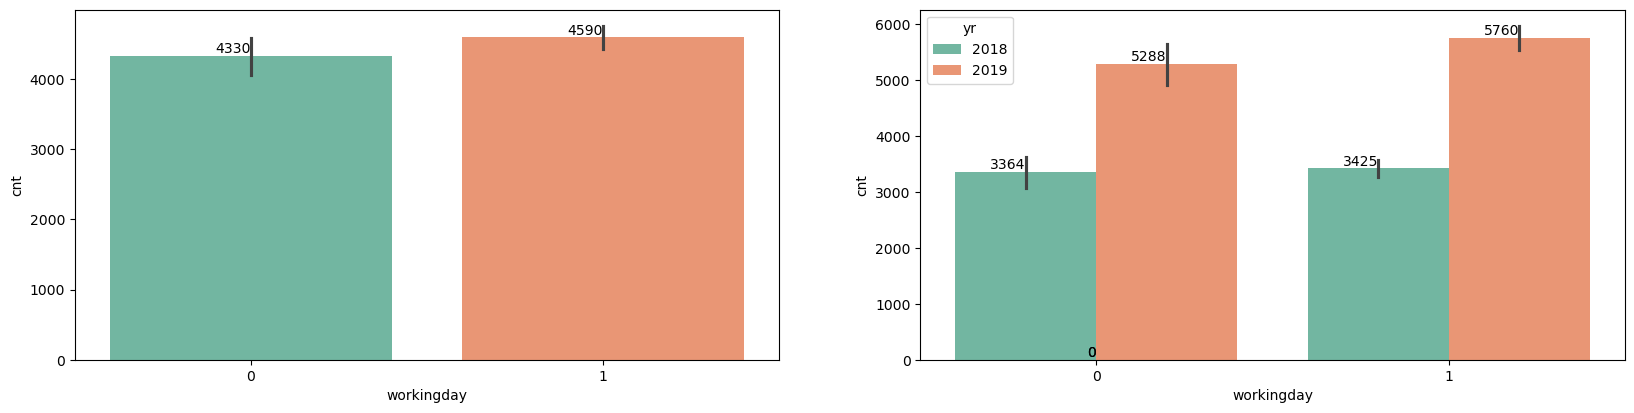

In [17330]:
# Create bar-plots of categorical variables - workingday Vs cnt

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
workingday_cnt=sns.barplot(x='workingday',y='cnt',data=Bike_Sharing,palette='Set2')
for p in workingday_cnt.patches:
    workingday_cnt.annotate(f'{p.get_height():.0f}', 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='right', va='bottom')
plt.subplot(2,2,2)
workingday_cnt_yr=sns.barplot(x='workingday',y='cnt',data=Bike_Sharing, hue='yr',palette='Set2')
for p in workingday_cnt_yr.patches:
    workingday_cnt_yr.annotate(f'{p.get_height():.0f}', 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='right', va='bottom')

plt.show()

The count of booking is more on workingdays comapred to non-working days. Also, number of bike booking has increased in 2019 for both working and non-working days.

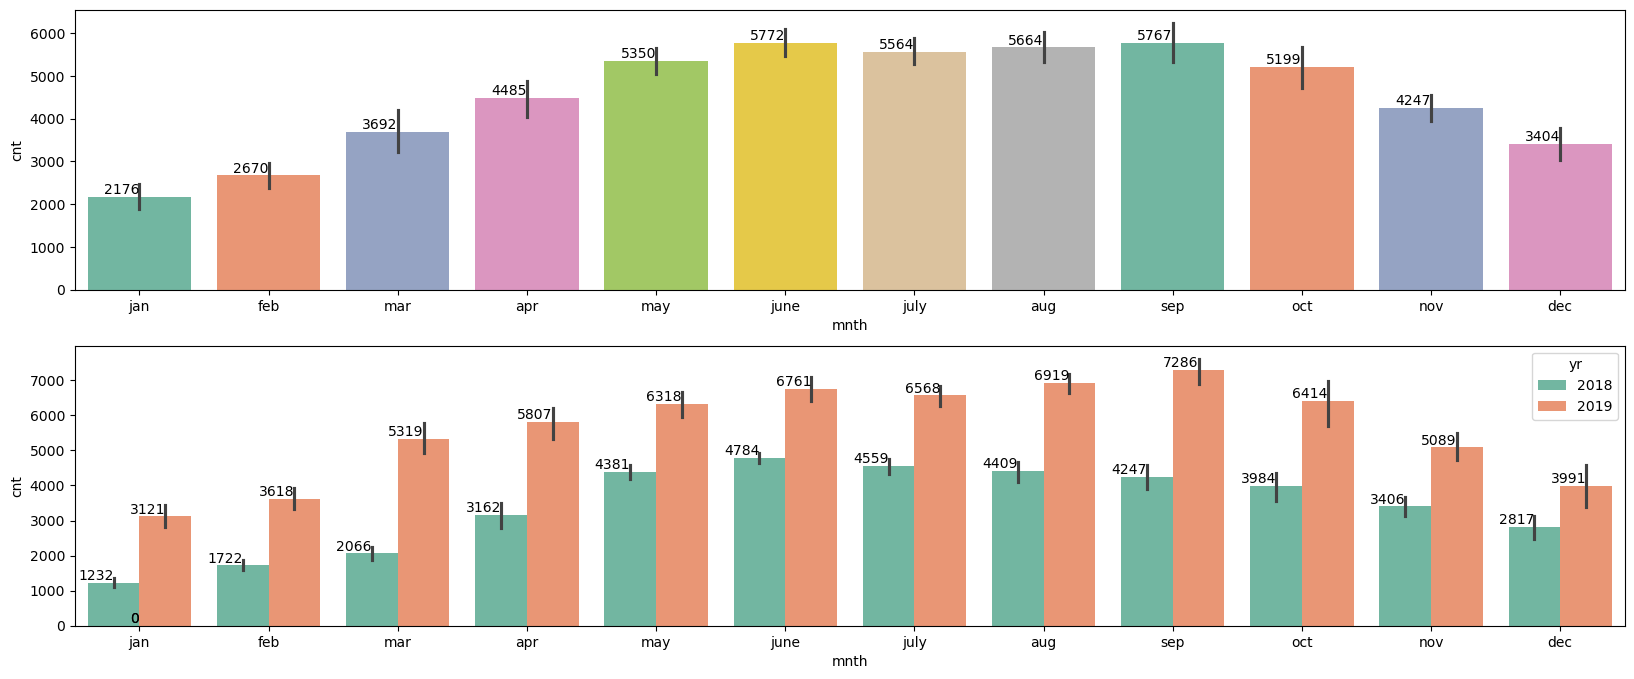

In [17332]:
# Create bar-plot of categorical variable - month and cnt
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
mnth_cnt = sns.barplot(x='mnth',y='cnt', data=Bike_Sharing, palette='Set2')
for p in mnth_cnt.patches:
    mnth_cnt.annotate(f'{p.get_height():.0f}', 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='right', va='bottom')
    
plt.subplot(2,1,2)
mnth_cnt_yr=sns.barplot(x='mnth', y='cnt', data=Bike_Sharing, hue='yr',palette='Set2')
for p in mnth_cnt_yr.patches:
    mnth_cnt_yr.annotate(f'{p.get_height():.0f}', 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='right', va='bottom')
plt.show()


The count of booking in year 2019 is more than 2018 for all the months. In 2019, Sep had the highest booking for the bike

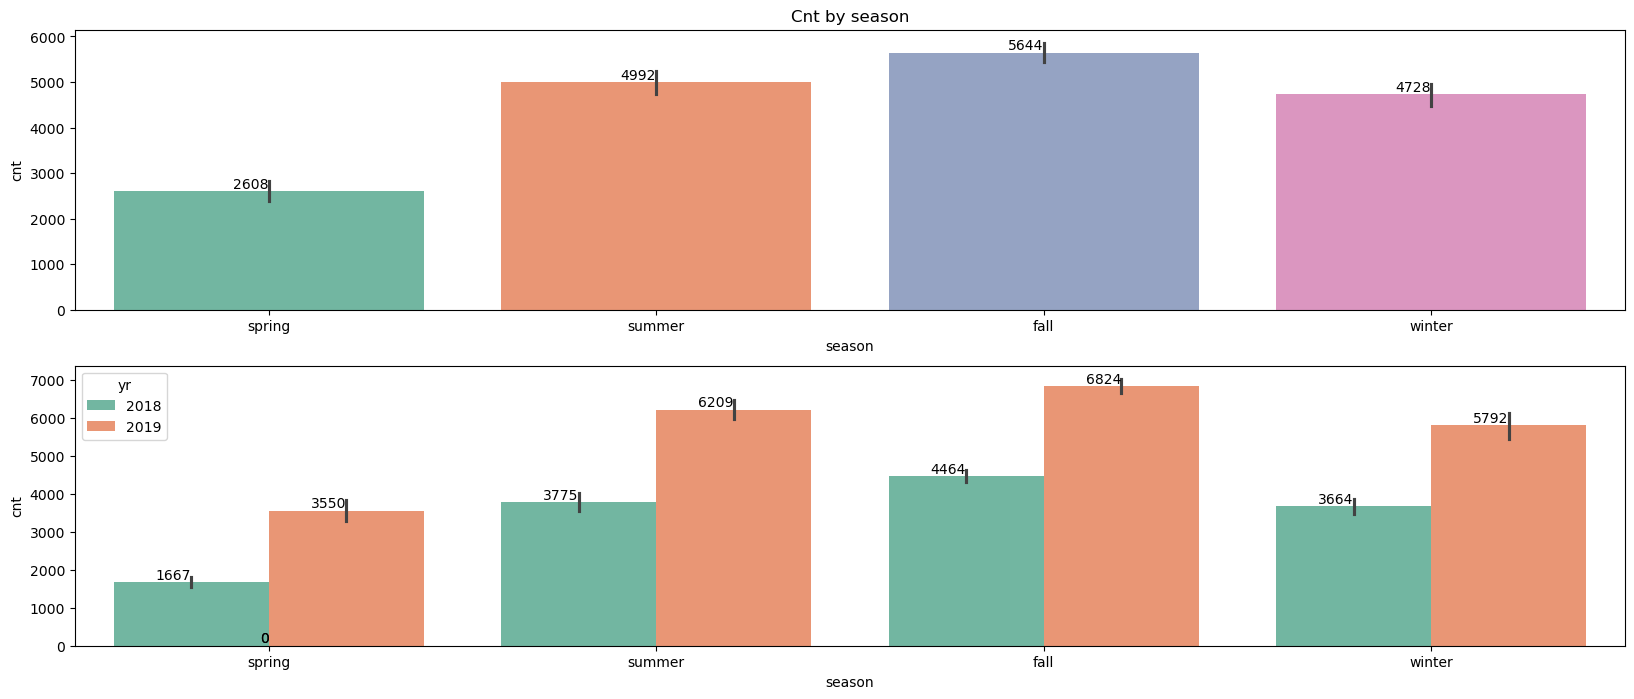

In [17334]:
# Create bar-plot of categorical variable - season and cnt
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.title("Cnt by season")
season_cnt = sns.barplot(x='season',y='cnt', data=Bike_Sharing, palette='Set2')
for p in season_cnt.patches:
    season_cnt.annotate(f'{p.get_height():.0f}', 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='right', va='bottom')
    
plt.subplot(2,1,2)

season_cnt_yr=sns.barplot(x='season', y='cnt', data=Bike_Sharing, hue='yr',palette='Set2')
for p in season_cnt_yr.patches:
    season_cnt_yr.annotate(f'{p.get_height():.0f}', 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='right', va='bottom')

plt.show()

The booking was more in 2019 for almost all the season compared to 2018. Maximum booking was done in fall season for both the years.

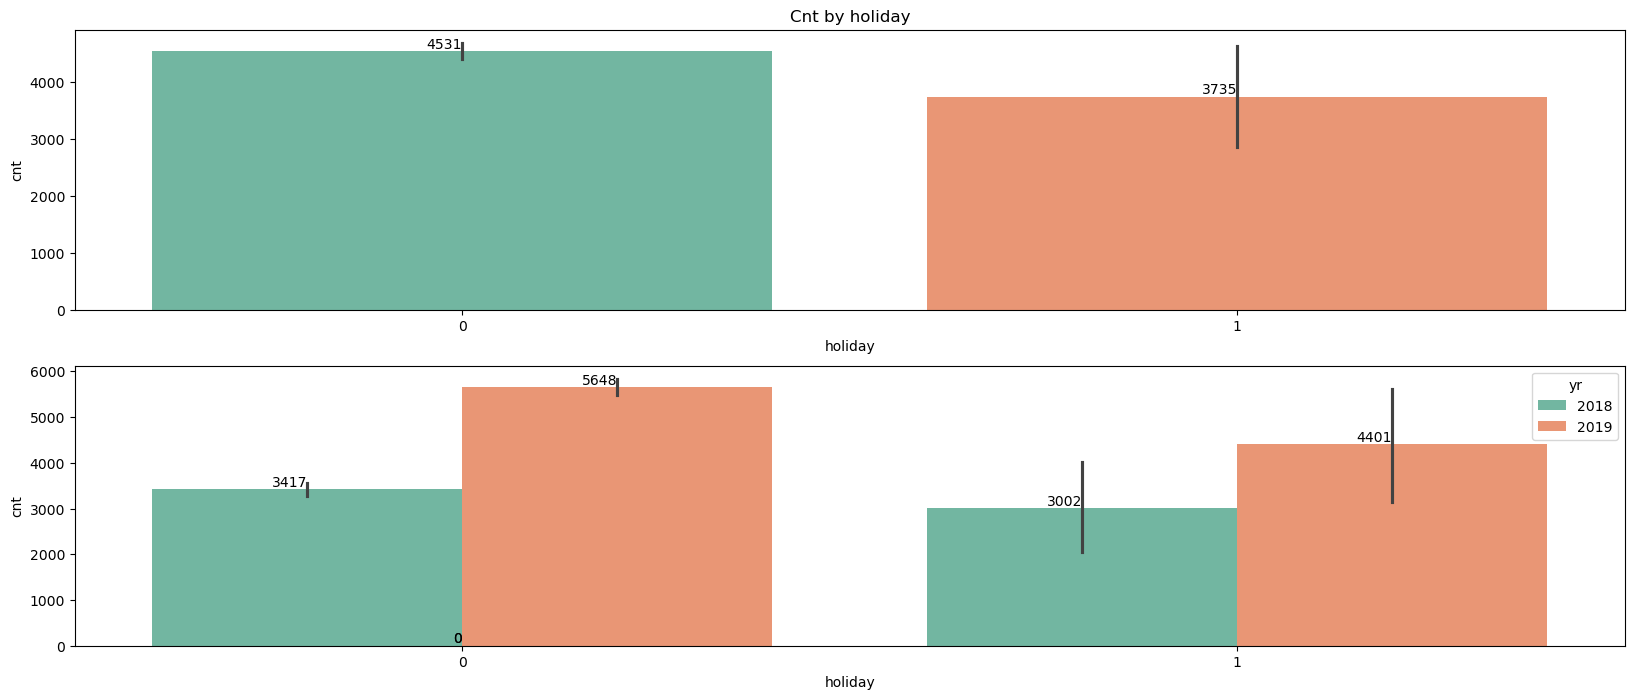

In [17336]:
# Create bar-plot of categorical variable - holiday and cnt
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.title("Cnt by holiday")
holiday_cnt = sns.barplot(x='holiday',y='cnt', data=Bike_Sharing, palette='Set2')
for p in holiday_cnt.patches:
    holiday_cnt.annotate(f'{p.get_height():.0f}', 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='right', va='bottom')
    
plt.subplot(2,1,2)

holiday_cnt_yr=sns.barplot(x='holiday', y='cnt', data=Bike_Sharing, hue='yr',palette='Set2')
for p in holiday_cnt_yr.patches:
    holiday_cnt_yr.annotate(f'{p.get_height():.0f}', 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='right', va='bottom')

plt.show()

The number of bookings increased when it wasn't holiday for year 2018 and 2019


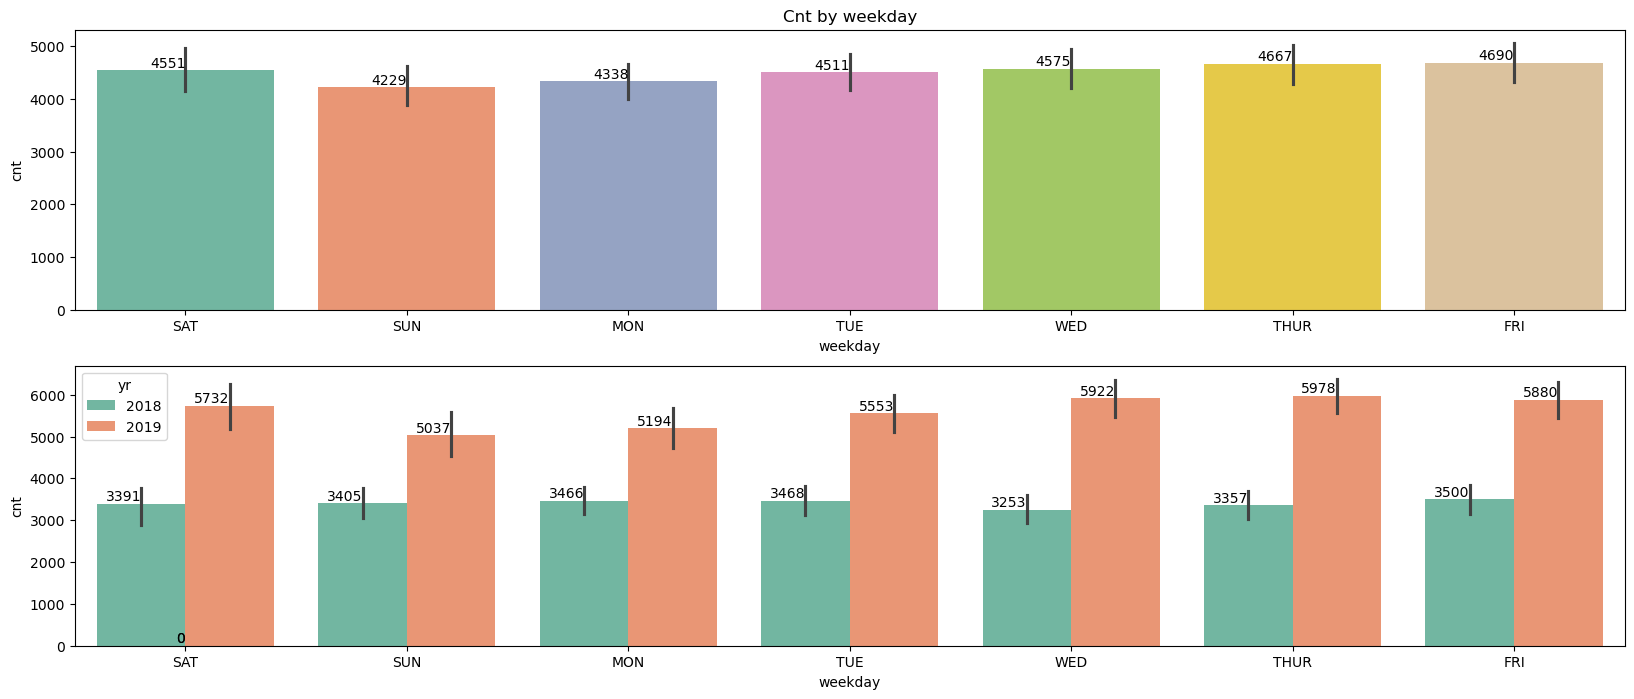

In [17338]:
# Create bar-plot of categorical variable - weekday and cnt
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.title("Cnt by weekday")
weekday_cnt = sns.barplot(x='weekday',y='cnt', data=Bike_Sharing, palette='Set2')
for p in weekday_cnt.patches:
    weekday_cnt.annotate(f'{p.get_height():.0f}', 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='right', va='bottom')
    
plt.subplot(2,1,2)

weekday_cnt_yr=sns.barplot(x='weekday', y='cnt', data=Bike_Sharing, hue='yr',palette='Set2')
for p in weekday_cnt_yr.patches:
    weekday_cnt_yr.annotate(f'{p.get_height():.0f}', 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='right', va='bottom')

plt.show()

The count of booking was more on weekdays - Thur and second highest on Fri for 2019

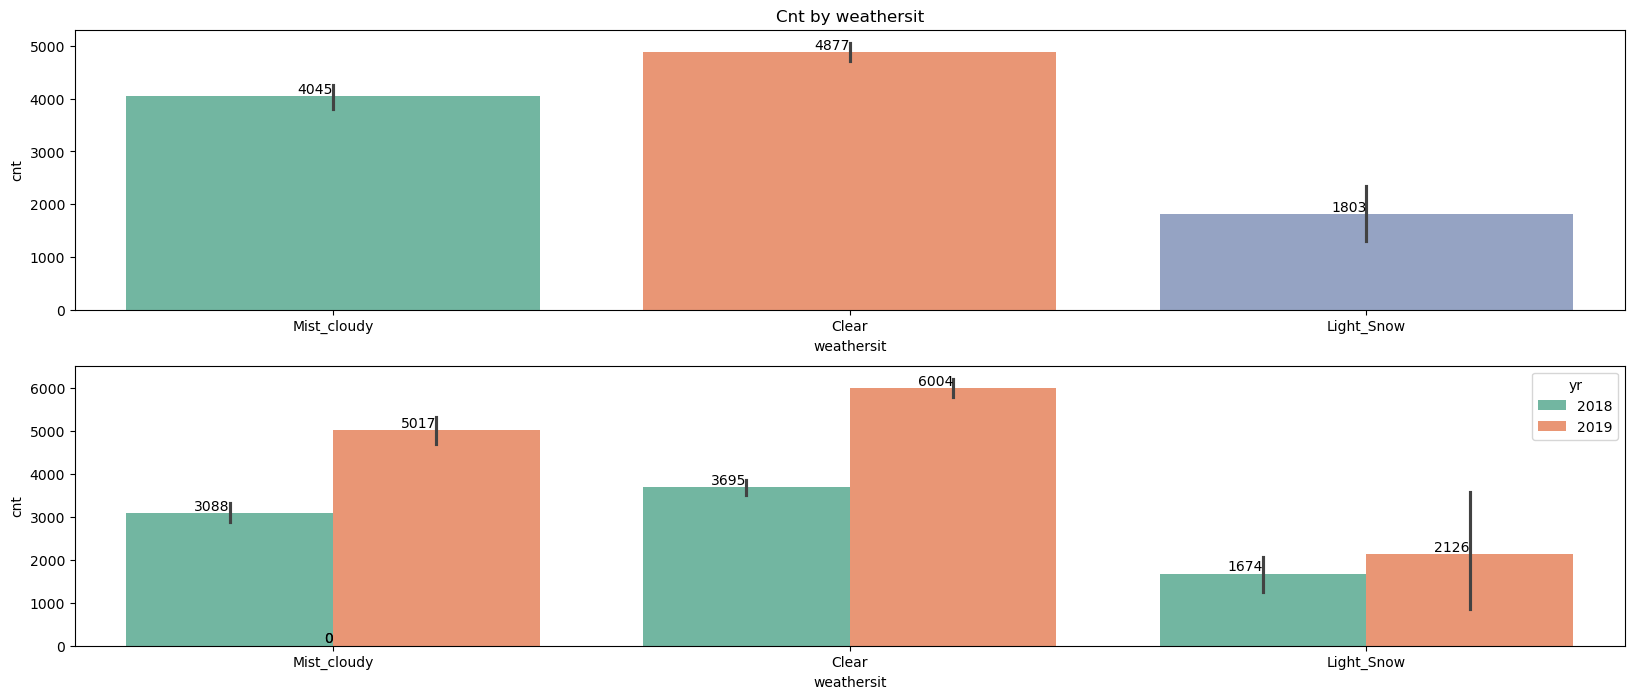

In [17340]:
# Create bar-plot of categorical variable - weathersit and cnt
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.title("Cnt by weathersit")
weathersit_cnt = sns.barplot(x='weathersit',y='cnt', data=Bike_Sharing, palette='Set2')
for p in weathersit_cnt.patches:
    weathersit_cnt.annotate(f'{p.get_height():.0f}', 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='right', va='bottom')
    
plt.subplot(2,1,2)

weathersit_cnt_yr=sns.barplot(x='weathersit', y='cnt', data=Bike_Sharing, hue='yr',palette='Set2')
for p in weathersit_cnt_yr.patches:
    weathersit_cnt_yr.annotate(f'{p.get_height():.0f}', 
    (p.get_x() + p.get_width() / 2., p.get_height()), 
    ha='right', va='bottom')

plt.show()

The booking of bike was more when weather was clear compared to cloudy and sunny days

In [17342]:
Bike_Sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,SAT,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,SUN,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,MON,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,TUE,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,WED,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Bivariate Analysis - Numerical columns

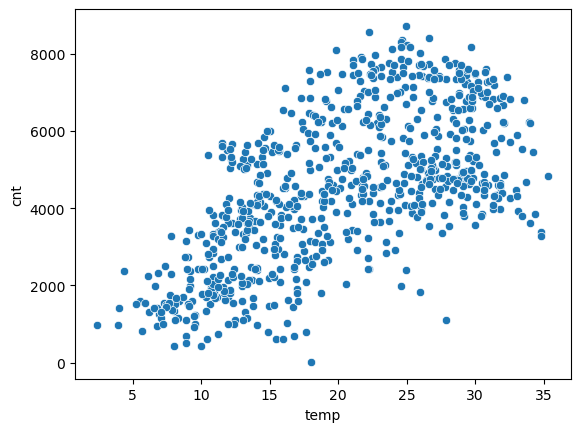

In [17344]:
# Visulaizing the numerical columns
sns.scatterplot(x='temp', y='cnt', data=Bike_Sharing)
plt.show()

The above graph shows linear relationship between temp and count

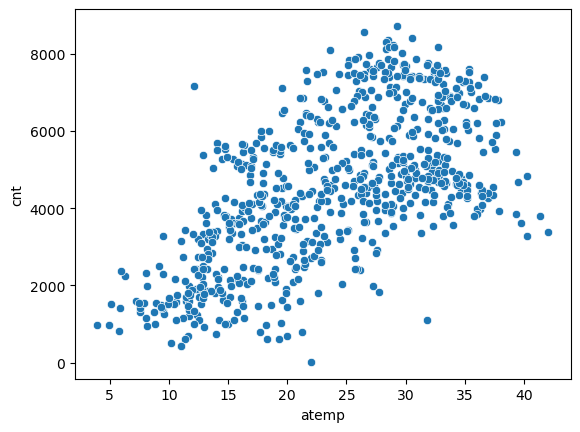

In [17346]:
# Scatterplot between atemp and count variable 
sns.scatterplot(x='atemp', y='cnt', data=Bike_Sharing)
plt.show()

The above graph shows linear realtionship between atemp and count variable and trend is similar to temp variable.

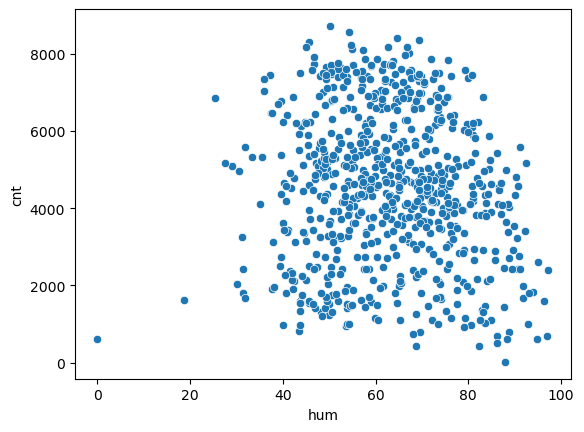

In [17348]:
# The scatterbetween humidity and count 
sns.scatterplot(x='hum', y='cnt', data=Bike_Sharing)
plt.show()

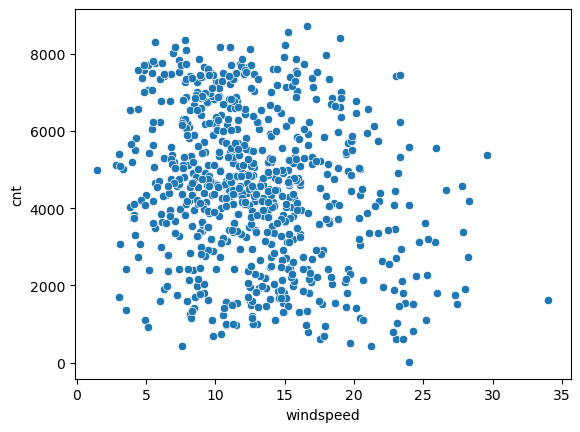

In [17349]:
# The scatter-plot between windspeed and count 
sns.scatterplot(x='windspeed', y='cnt', data=Bike_Sharing)
plt.show()

In [17350]:
Bike_Sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,SAT,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,SUN,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,MON,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,TUE,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,WED,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Multivariate Analysis 

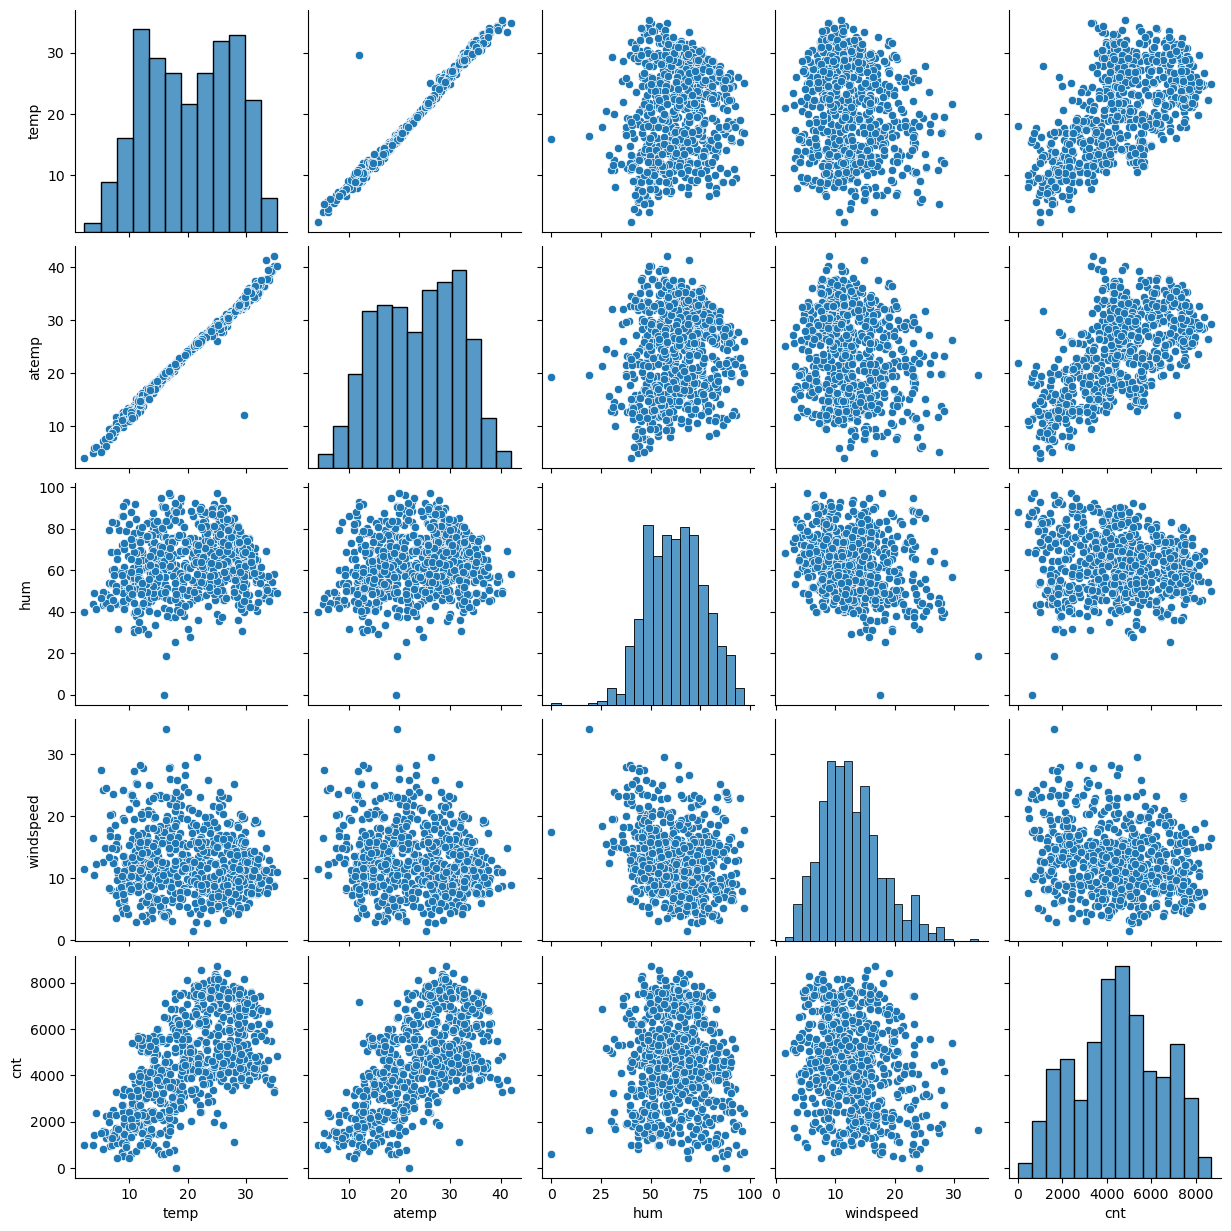

In [17352]:
# Draw the pair-plot between numerical columns
sns.pairplot(data=Bike_Sharing, vars =['temp','atemp','hum','windspeed', 'cnt'] )
plt.show()

In [17353]:
# Find the correlation between numerical columns
corr_num = Bike_Sharing[['temp','atemp','hum','windspeed', 'cnt']].corr()
corr_num

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


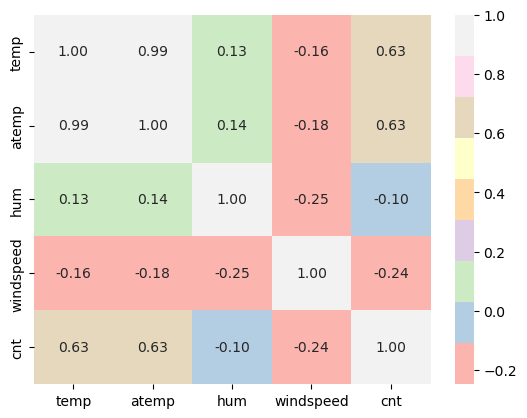

In [17354]:
sns.heatmap(corr_num, annot=True, cmap='Pastel1', fmt=".2f")
plt.show()

From the above graphs we can conclude that :
1. Count variable is highly correlated to temp and a temp varible 
2. Count variable is negatively correlated to windspeed variable
3. Temp and a temp variable are highly correlated to each other. We can use either one of them in our analysis. 

# Data Preparation - creating dummies

In [17357]:
# Let's map year back to 0 and 1 for analysis
Bike_Sharing['yr'] = Bike_Sharing['yr'].map({2018:0, 2019:1})
Bike_Sharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,SAT,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,SUN,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,MON,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,TUE,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,WED,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,THUR,1,Mist_cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,dec,0,FRI,1,Mist_cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,dec,0,SAT,0,Mist_cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,dec,0,SUN,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [17358]:
# Data preparation 
# Let's create dummy variables 
Bike_Sharing_season = pd.get_dummies(Bike_Sharing["season"], drop_first=True)
Bike_Sharing_mnth = pd.get_dummies(Bike_Sharing["mnth"], drop_first=True)
Bike_Sharing_weekday = pd.get_dummies(Bike_Sharing["weekday"], drop_first=True)
Bike_Sharing_weathersit = pd.get_dummies(Bike_Sharing["weathersit"],drop_first=True)

Bike_Sharing_dummies = pd.concat([Bike_Sharing_season, Bike_Sharing_mnth, Bike_Sharing_weekday, Bike_Sharing_weathersit], axis = 1)
Bike_Sharing_dummies = Bike_Sharing_dummies.astype(int)
Bike_Sharing_dummies

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,oct,sep,MON,SAT,SUN,THUR,TUE,WED,Light_Snow,Mist_cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [17359]:
Bike_Sharing_dummies.columns

Index(['spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'july',
       'june', 'mar', 'may', 'nov', 'oct', 'sep', 'MON', 'SAT', 'SUN', 'THUR',
       'TUE', 'WED', 'Light_Snow', 'Mist_cloudy'],
      dtype='object')

In [17360]:
# Concat the dummies varible to original dataframe
Bike_Sharing = pd.concat([Bike_Sharing, Bike_Sharing_dummies], axis = 1)
Bike_Sharing

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,MON,SAT,SUN,THUR,TUE,WED,Light_Snow,Mist_cloudy
0,spring,0,jan,0,SAT,0,Mist_cloudy,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,SUN,0,Mist_cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,MON,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,TUE,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,WED,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,dec,0,THUR,1,Mist_cloudy,10.420847,11.33210,65.2917,...,0,0,0,0,0,1,0,0,0,1
726,spring,1,dec,0,FRI,1,Mist_cloudy,10.386653,12.75230,59.0000,...,0,0,0,0,0,0,0,0,0,1
727,spring,1,dec,0,SAT,0,Mist_cloudy,10.386653,12.12000,75.2917,...,0,0,0,1,0,0,0,0,0,1
728,spring,1,dec,0,SUN,0,Clear,10.489153,11.58500,48.3333,...,0,0,0,0,1,0,0,0,0,0


In [17361]:
# Let's drop the columns for which we have created dummyy variables - "season","mnth","weekday", "weathersit"
Bike_Sharing.drop(['season','mnth','weekday', 'weathersit'], axis=1, inplace = True)
Bike_Sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,MON,SAT,SUN,THUR,TUE,WED,Light_Snow,Mist_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


# Splitting the Data into Training and Testing Sets

In [17363]:
# Import train_test_split 
from sklearn.model_selection import train_test_split

In [17364]:
# y should contain the target variable cnt
y=Bike_Sharing.pop('cnt')

# X contains all the other variables
X=Bike_Sharing

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42)

In [17365]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(510, 29)
(219, 29)


## Rescaling the feature 

In [17367]:
# Import MinMaxSclaer
from sklearn.preprocessing import MinMaxScaler

In [17368]:
scaler = MinMaxScaler()

In [17369]:
# Let us scale continuous variables present in our data-sets
num_vars = ['temp','atemp','hum','windspeed']

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])


In [17370]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,MON,SAT,SUN,THUR,TUE,WED,Light_Snow,Mist_cloudy
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0,0,1,...,1,0,1,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0,1,0,...,0,0,1,0,0,0,0,0,0,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,1,0,0,...,0,0,0,0,0,0,1,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0,0,1,...,1,0,0,0,0,0,0,1,0,1
625,1,0,1,0.703024,0.637937,0.899098,0.839562,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [17371]:
# Find the correlation 
df_corr = X_train.corr()
df_corr

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,oct,sep,MON,SAT,SUN,THUR,TUE,WED,Light_Snow,Mist_cloudy
yr,1.000000,0.016769,-0.007129,0.038038,0.038088,-0.091990,-0.014391,-0.014382,-0.020893,0.020272,...,0.027512,0.027512,0.037044,-0.001763,0.003464,-0.001304,-0.034221,-0.045712,-0.065596,0.034710
holiday,0.016769,1.000000,-0.238648,-0.072032,-0.075811,-0.012172,-0.030758,0.078562,-0.043839,0.013459,...,0.030885,-0.011007,0.300381,-0.070848,-0.071389,-0.035877,-0.029813,-0.067565,-0.029246,-0.020986
workingday,-0.007129,-0.238648,1.000000,0.117350,0.120863,0.024569,-0.062576,-0.068138,0.032511,-0.015221,...,-0.025548,0.018077,0.165923,-0.599012,-0.603586,0.280554,0.261449,0.283115,-0.000725,0.029105
temp,0.038038,-0.072032,0.117350,1.000000,0.996588,0.132010,-0.169870,-0.639100,0.169589,-0.221207,...,-0.010247,0.213047,0.011578,-0.044224,-0.076778,0.021608,0.025056,0.049940,-0.094117,-0.053218
atemp,0.038088,-0.075811,0.120863,0.996588,1.000000,0.141734,-0.195682,-0.646852,0.175271,-0.204303,...,0.000629,0.208455,0.017113,-0.045830,-0.078058,0.023592,0.021131,0.045988,-0.103810,-0.052762
hum,-0.091990,-0.012172,0.024569,0.132010,0.141734,1.000000,-0.245442,-0.159875,-0.027866,0.136832,...,0.131857,0.155403,0.008872,-0.011413,-0.015252,-0.113408,0.077551,0.066734,0.239151,0.484688
windspeed,-0.014391,-0.030758,-0.062576,-0.169870,-0.195682,-0.245442,1.000000,0.143769,0.128073,-0.132411,...,-0.072039,-0.094888,-0.005190,0.051082,0.044986,-0.011627,0.014603,-0.054744,0.137641,-0.010897
spring,-0.014382,0.078562,-0.068138,-0.639100,-0.646852,-0.159875,0.143769,1.000000,-0.322563,-0.317593,...,-0.172750,-0.172750,0.005428,-0.010593,0.063982,-0.030890,-0.006909,-0.019173,0.014569,0.002723
summer,-0.020893,-0.043839,0.032511,0.169589,0.175271,-0.027866,0.128073,-0.322563,1.000000,-0.340321,...,-0.185113,-0.185113,0.018632,0.002777,-0.025378,-0.016026,0.023784,-0.016040,-0.022656,0.045239
winter,0.020272,0.013459,-0.015221,-0.221207,-0.204303,0.136832,-0.132411,-0.317593,-0.340321,1.000000,...,0.543935,0.007181,-0.013646,0.008520,0.005321,0.027791,-0.010920,-0.010707,0.059830,0.036409


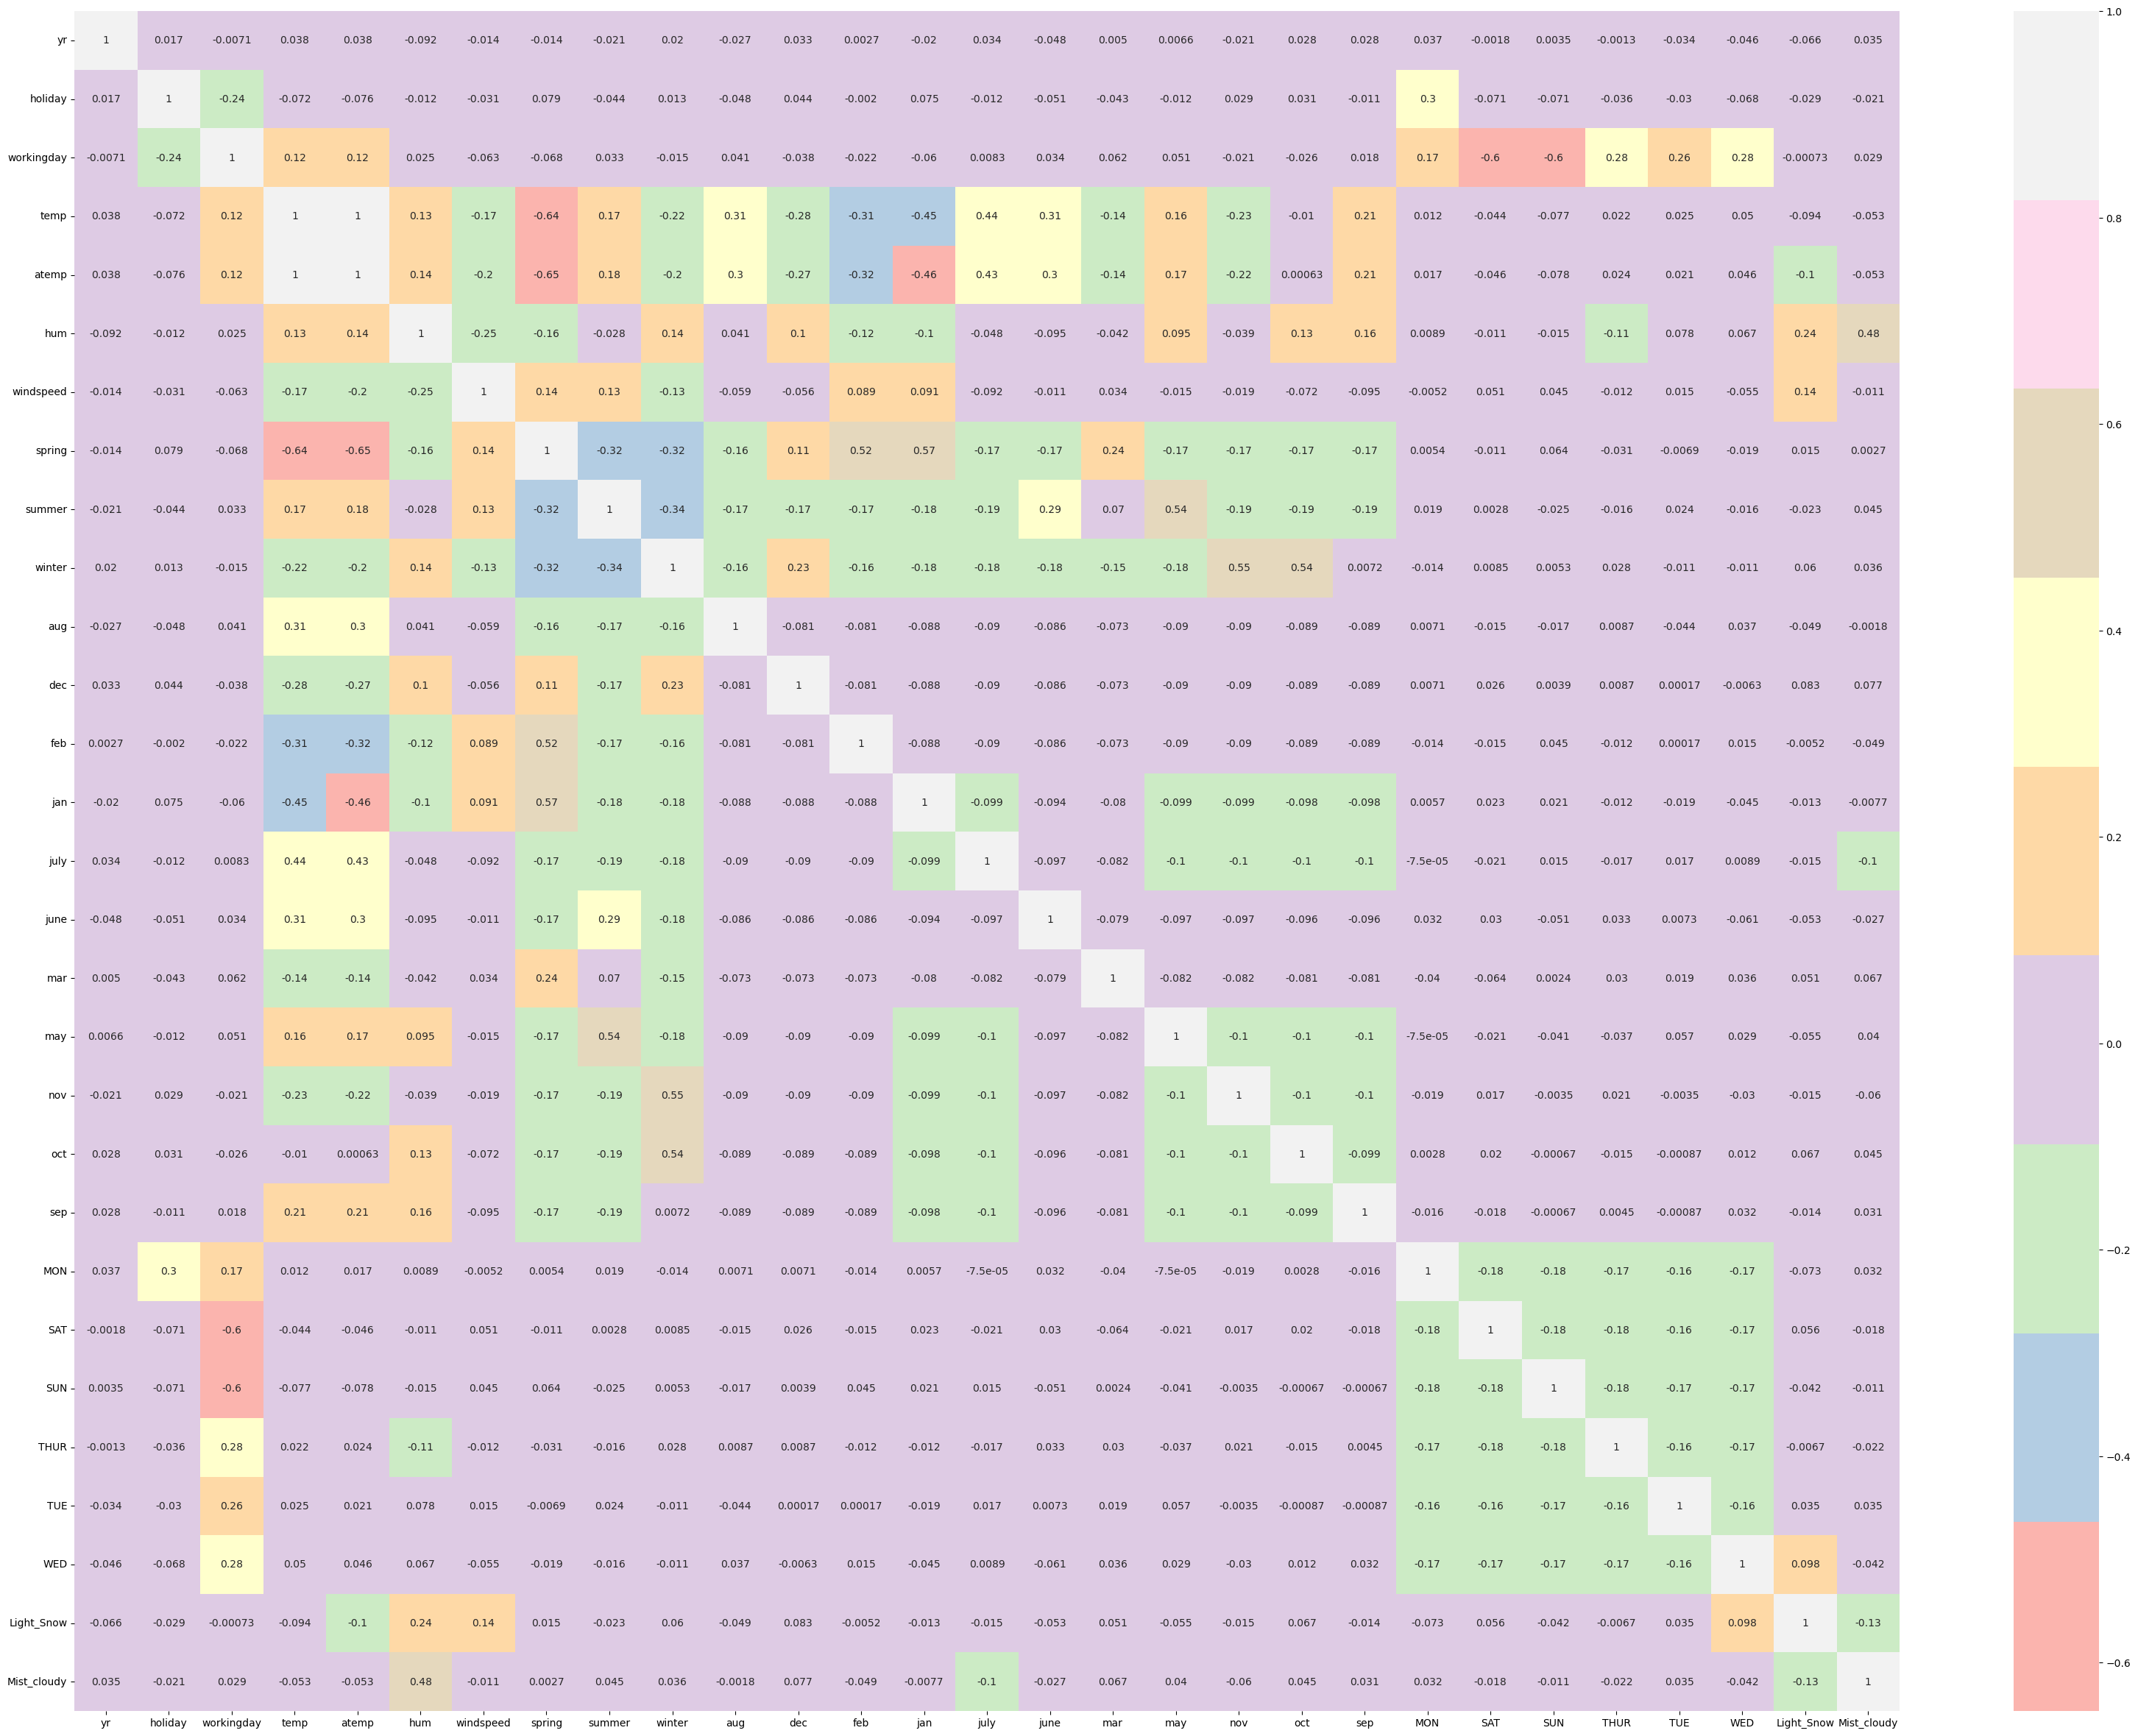

In [17372]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 30))
sns.heatmap(df_corr, annot = True, cmap="Pastel1")
plt.show()

- The key points from the above graph : 
- The 'temp' and 'atemp' are highly corelated to each other. 
- cnt shows high correlation to temp, atemp and yr. 
- Mist cloudy is corelated to hum. 
- Mon, Tue, wed, Thur shows high corelation to workingday and Sat, Sun have negative correlation with workingday. 
- Summer is highly correlated to May and June month

In [17374]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17375]:
#Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [17376]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 15),
 ('winter', True, 1),
 ('aug', True, 1),
 ('dec', True, 1),
 ('feb', False, 7),
 ('jan', False, 6),
 ('july', True, 1),
 ('june', True, 1),
 ('mar', False, 5),
 ('may', False, 13),
 ('nov', True, 1),
 ('oct', False, 8),
 ('sep', False, 14),
 ('MON', False, 11),
 ('SAT', False, 2),
 ('SUN', False, 4),
 ('THUR', False, 9),
 ('TUE', False, 12),
 ('WED', False, 10),
 ('Light_Snow', True, 1),
 ('Mist_cloudy', True, 1)]

In [17377]:
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'aug', 'dec', 'july', 'june', 'nov', 'Light_Snow',
       'Mist_cloudy'],
      dtype='object')

In [17378]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'feb', 'jan', 'mar', 'may', 'oct', 'sep', 'MON',
       'SAT', 'SUN', 'THUR', 'TUE', 'WED'],
      dtype='object')

In [17379]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'aug', 'dec', 'july', 'june', 'nov', 'Light_Snow',
       'Mist_cloudy']]

In [17380]:
X_train_rfe.shape

(510, 15)

## Building the model 

In [17382]:
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating the VIFs for the selected columns 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,1298.64
3,atemp,1279.43
4,hum,26.70
5,windspeed,5.43
7,winter,2.88
6,spring,2.66
14,Mist_cloudy,2.25
0,yr,2.12
10,july,1.91
12,nov,1.86


In [17383]:
import statsmodels.api as sm

# Adding a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Creating a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()
# Print a summary 
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.59e-184
Time:                        15:16:21   Log-Likelihood:                -4118.4
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     494   BIC:                             8336.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3202.6573    304.715     10.510      



#### We are removing atmep and keeping temp variable as both of them has highest VIF. Both of them highly correlated as well

## Model-2

In [17386]:
# drop the atemp from available columns
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [17387]:
# Adding a constant on the second model
X_train_lm2 = sm.add_constant(X_train_new)

# Create a second fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
# Print a summary 
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.37e-185
Time:                        15:16:21   Log-Likelihood:                -4118.5
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     495   BIC:                             8331.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3227.6285    301.560     10.703      

In [17388]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.91
2,temp,23.69
4,windspeed,5.11
6,winter,2.87
5,spring,2.66
13,Mist_cloudy,2.23
0,yr,2.12
9,july,1.88
11,nov,1.85
10,june,1.61


#### Let's remove the hum variable as it has the highest VIF

## Model-3

In [17391]:
# Let's drop the humidity variable 
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [17392]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a third fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
# Print a summary 
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.02e-182
Time:                        15:16:22   Log-Likelihood:                -4128.1
No. Observations:                 510   AIC:                             8284.
Df Residuals:                     496   BIC:                             8344.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2412.0843    240.556     10.027      

In [17393]:
# Calculate the VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,7.47
3,windspeed,5.09
5,winter,2.64
0,yr,2.11
10,nov,1.79
4,spring,1.76
8,july,1.71
12,Mist_cloudy,1.57
9,june,1.50
6,aug,1.47


The June month has highest p-value. Let's remove it in our next model

## Model-4

In [17396]:
# Let's drop the june month
X_train_new = X_train_new.drop(["june"], axis = 1)

In [17397]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a fourth fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.25e-183
Time:                        15:16:22   Log-Likelihood:                -4129.7
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2478.0155    238.129     10.406      

In [17398]:
# Calculate VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.86
3,windspeed,5.06
5,winter,2.45
0,yr,2.09
9,nov,1.78
4,spring,1.73
11,Mist_cloudy,1.56
8,july,1.48
6,aug,1.31
7,dec,1.31


Since dec and winter are correlated. Let's remove Dec

## Model-5

In [17401]:
X_train_new = X_train_new.drop(["dec"], axis = 1)

In [17402]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.21e-181
Time:                        15:16:22   Log-Likelihood:                -4137.5
No. Observations:                 510   AIC:                             8299.
Df Residuals:                     498   BIC:                             8350.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2285.8331    236.409      9.669      

In [17403]:
# Calculate VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.80
3,windspeed,5.06
0,yr,2.09
5,winter,2.09
4,spring,1.69
8,nov,1.65
10,Mist_cloudy,1.55
7,july,1.48
6,aug,1.31
9,Light_Snow,1.09


## Model-6

In [17405]:
# Let's drop the Nov month as it also has correlation with winters
X_train_new = X_train_new.drop(["nov"], axis = 1)

In [17406]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a 6th fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()
# Print a summary 
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.34e-180
Time:                        15:16:22   Log-Likelihood:                -4142.7
No. Observations:                 510   AIC:                             8307.
Df Residuals:                     499   BIC:                             8354.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2135.0629    233.845      9.130      

In [17407]:
# Calculate VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.69
3,windspeed,4.93
0,yr,2.09
4,spring,1.68
9,Mist_cloudy,1.54
7,july,1.47
5,winter,1.45
6,aug,1.31
8,Light_Snow,1.08
1,holiday,1.04


Let's remove july month in our next model

## Model-7

In [17410]:
X_train_new = X_train_new.drop(["july"], axis = 1)

In [17411]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a 7th fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()
# Print a summary
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     241.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.06e-175
Time:                        15:16:22   Log-Likelihood:                -4155.9
No. Observations:                 510   AIC:                             8332.
Df Residuals:                     500   BIC:                             8374.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2356.3417    235.656      9.999      

In [17412]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.80
2,temp,4.45
0,yr,2.09
4,spring,1.68
8,Mist_cloudy,1.52
5,winter,1.39
6,aug,1.21
7,Light_Snow,1.08
1,holiday,1.04


P-value for aug month has increased. Let's remove Aug month 

## Model-8

In [17415]:
# Drop Aug month
X_train_new = X_train_new.drop(["aug"], axis = 1)

In [17416]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

# Create a 8th fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()
# Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     270.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.89e-176
Time:                        15:16:22   Log-Likelihood:                -4157.5
No. Observations:                 510   AIC:                             8333.
Df Residuals:                     501   BIC:                             8371.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2375.1881    235.902     10.069      

In [17417]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.79
2,temp,4.05
0,yr,2.08
4,spring,1.68
7,Mist_cloudy,1.52
5,winter,1.36
6,Light_Snow,1.08
1,holiday,1.04


VIF score of all the variable are less than 5 and p-value for all the variable is also less than 0.05. These values are acceptable for model building. The final R^2 is 81.2% with VIF score less than 5 and p-value less than 0.05

In [17419]:
Model8_corr = X_train_new.corr()
Model8_corr

,yr,holiday,temp,windspeed,spring,winter,Light_Snow,Mist_cloudy
yr,1.000000,0.016769,0.038038,-0.014391,-0.014382,0.020272,-0.065596,0.034710
holiday,0.016769,1.000000,-0.072032,-0.030758,0.078562,0.013459,-0.029246,-0.020986
temp,0.038038,-0.072032,1.000000,-0.169870,-0.639100,-0.221207,-0.094117,-0.053218
windspeed,-0.014391,-0.030758,-0.169870,1.000000,0.143769,-0.132411,0.137641,-0.010897
spring,-0.014382,0.078562,-0.639100,0.143769,1.000000,-0.317593,0.014569,0.002723
winter,0.020272,0.013459,-0.221207,-0.132411,-0.317593,1.000000,0.059830,0.036409
Light_Snow,-0.065596,-0.029246,-0.094117,0.137641,0.014569,0.059830,1.000000,-0.126365
Mist_cloudy,0.034710,-0.020986,-0.053218,-0.010897,0.002723,0.036409,-0.126365,1.000000


<Axes: >

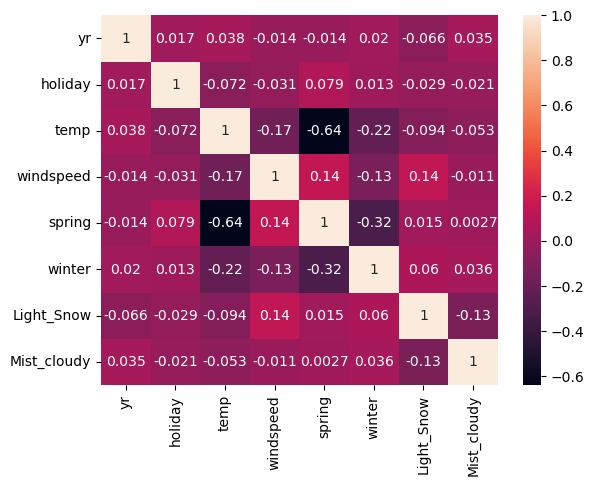

In [17420]:
sns.heatmap(Model8_corr, annot= True)

We can view independent variables are not correlated to each other

In [17422]:
# Residual Analysis

Let's check if error terms are normally distributed. 
Let us plot the histogram of the error terms and see what it looks like

In [17424]:
y_train_predictions = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

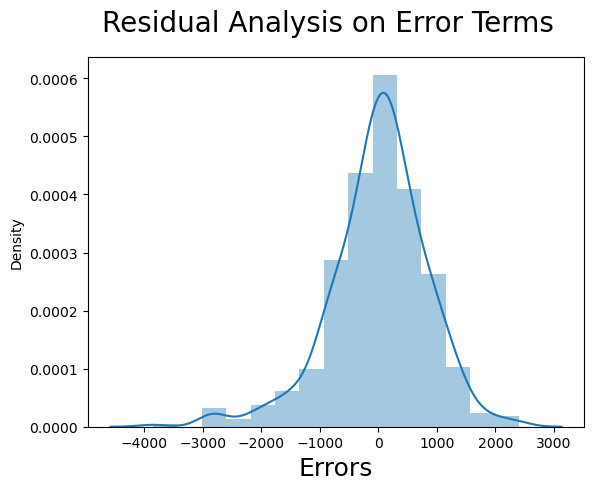

In [17425]:
#res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predictions), bins = 15)
fig.suptitle('Residual Analysis on Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)                        

The above graph shows that error terms are normally distributed 

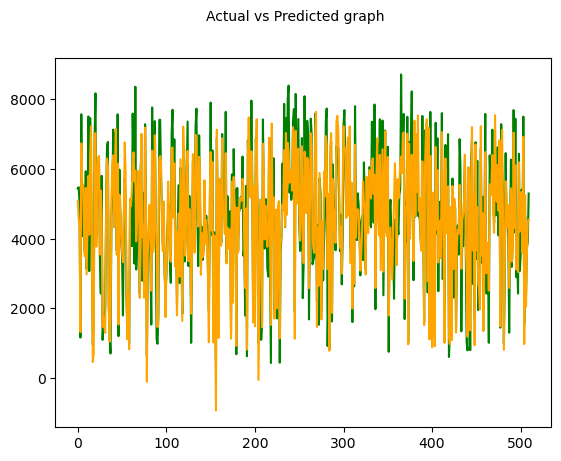

In [17427]:
# Let's draw the Actual vs Predicted graph
a = [j for j in range(0,len(X_train),1)]
plt.plot(a,y_train, color="green")
plt.plot(a,y_train_predictions, color="orange")
plt.suptitle('Actual vs Predicted graph', fontsize = 10)
plt.show()

The above graph shows actual and predicated values are overlapping

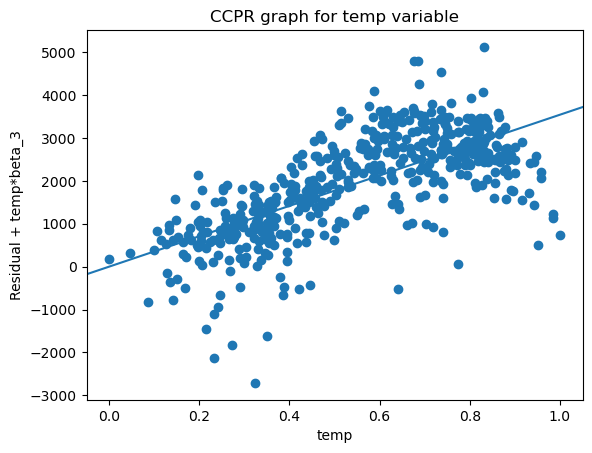

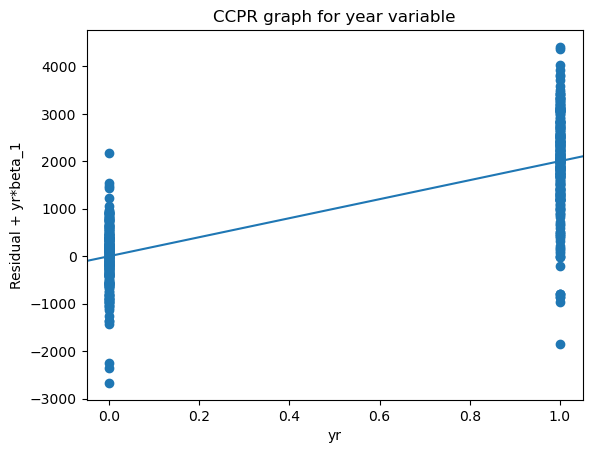

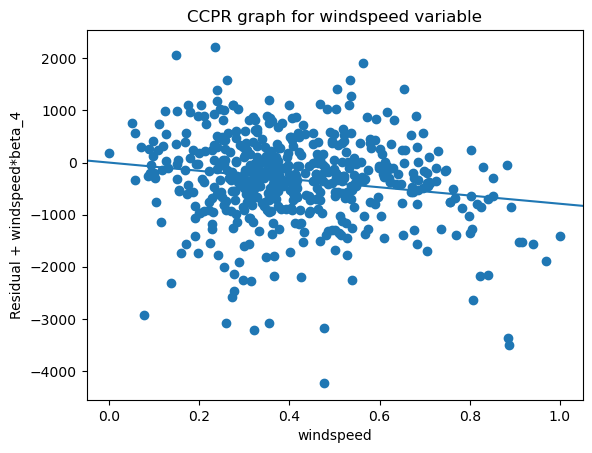

In [17429]:
# Validation of linear relationships for predicative variables - temp, year and windspeed


sm.graphics.plot_ccpr(lr8, 'temp')
plt.title('CCPR graph for temp variable')
plt.show()

sm.graphics.plot_ccpr(lr8, 'yr')
plt.title('CCPR graph for year variable')
plt.show()

sm.graphics.plot_ccpr(lr8, 'windspeed')
plt.title('CCPR graph for windspeed variable')
plt.show()

# Making Predictions

In [17431]:
import sklearn
from sklearn.metrics import r2_score,mean_squared_error


#Print R-squared Value on train
r2_score(y_train,y_train_predictions)

0.8117818457777753

In [17432]:
# Scale the test data-set
num_variables = ['temp','atemp','hum','windspeed']

X_test[num_variables] = scaler.transform(X_test[num_variables])

In [17433]:
# The columns available in final model building 
test_columns = X_train_new.columns
X_test[test_columns]

,yr,holiday,temp,windspeed,spring,winter,Light_Snow,Mist_cloudy
468,1,0,0.543115,0.422104,0,0,0,0
148,0,0,0.758058,0.479765,0,0,0,0
302,0,0,0.324018,0.386287,0,1,0,0
355,0,0,0.453814,0.062325,1,0,0,1
515,1,0,0.773634,0.433030,0,0,0,0
...,...,...,...,...,...,...,...,...
332,0,0,0.497426,0.590357,0,1,0,1
532,1,0,0.664605,0.306856,0,0,0,0
558,1,0,0.838014,0.146420,0,0,0,1
137,0,0,0.611648,0.448592,0,0,0,1


In [17434]:
# Adding constant variable to test dataframe
X_test_model8 = sm.add_constant(X_test[test_columns])

In [17435]:
# Making predictions using the final(8th) model
y_test_predictions = lr8.predict(X_test_model8)


In [17436]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_predictions)

0.8170711131863022

Text(0, 0.5, 'y_test_predictions')

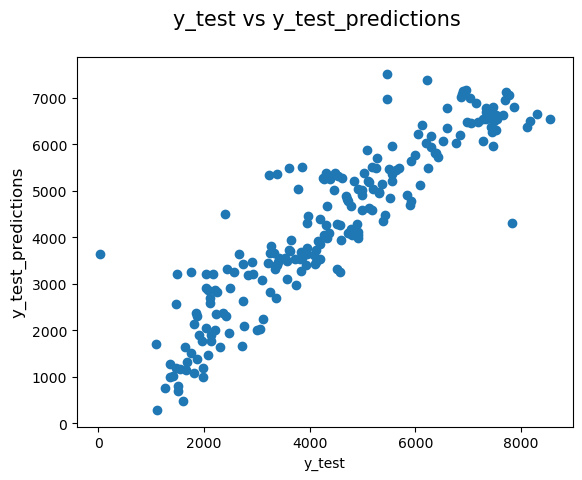

In [17437]:
# Plot the graph between y_test and y_test_prediction
fig = plt.figure()
plt.scatter(y_test, y_test_predictions)
fig.suptitle('y_test vs y_test_predictions', fontsize = 15)             
plt.xlabel('y_test', fontsize = 10)                          
plt.ylabel('y_test_predictions', fontsize = 12) 

With final model we are left with 8 input variables which have low VIF and low p-values. It shows there are no-correlation between themselves.
We can use the final model to make the predications in future.

Variables which can be used for predications as per the final models :
 Year, Temperature, Holiday, windspeed, Spring, Winter, Light snow and Mist cloudy 

 - Temperature : +3540 per unit increase. Warmer temperature shows more bike bookings. People prefer booking bike in hot weather rather than walking
 - Year : +2003 per year. Bike booking trend has increased from 2018 to 2019. It shows bike booking trend is increasing each year.
 - Holiday : -705 rentals on average. Bike booking less on holiday, it shows people might not be going out as much on holidays.
 - Windspeed : -790 bookings per unit increase in wind speed. People don't use bikes in high winds
 - Spring  : Spring season sees a Drop in Rentals (-1268 bookings). People prefer staying in home rather than using bike. It might be due to rainy weather during early Spring.
 - Winter : There is increase in bike Rentals (+434 bookings). Surprisingly, winter sees more rentals than other seasons, possibly due to commuter demand. It might be possible biking helps in keeping people warm due to increase in pysical movement
 - Light snow :Snow and cloudy weather reduces bike rentals. People prefer to stay at their places rather than going out. Maybe they are using other sources of commutes. 
- Mist/cloudy - It shows causes a huge drop (-2198 bookings). People are staying at their places rather than going out.



    